The pre-processing code is run at the start of the model building for easier access of variables.

(2193, 351)
0                  healthy
1                  healthy
2                  healthy
3                  healthy
4                  healthy
               ...        
2188    early stage cancer
2189    early stage cancer
2190    early stage cancer
2191    early stage cancer
2192    early stage cancer
Name: class_label, Length: 2193, dtype: object
class_label
early stage cancer        781
screening stage cancer    490
mid stage cancer          453
late stage cancer         409
healthy                    60
Name: count, dtype: int64
Shape of filtered data: (841, 351)
[0 1]
Optimization terminated successfully.
         Current function value: 0.591989
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            class_label   No. Observations:                  841
Model:                          Logit   Df Residuals:                      491
Method:                           MLE   Df Model:                          3

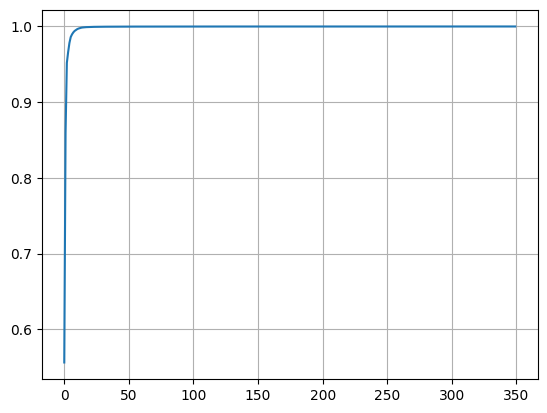

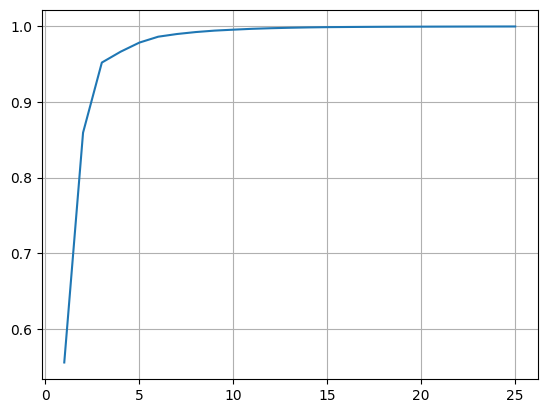

class_label
early stage cancer    781
healthy                60
Name: count, dtype: int64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
%run HealthyvsEarlyStageCancer.ipynb

The RandomUnderSampler from the 'imblearn' package is used to randomly undersample the majority class, which is the proportion of the population with the cancer, such that the ratio of healthy to cancer is 1:1. Logistic Regression model is initialised.

In [7]:
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.6)
from imblearn.pipeline import Pipeline
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_over, y_over = pipeline.fit_resample(xvals_filtered, yvals_binary)
logreg_model = LogisticRegression()
logreg_model.fit(X_over, y_over)
logreg_model.coef_, logreg_model.intercept_

(array([[-1.48482409e-02, -1.59906391e-02, -1.59317032e-02,
         -1.67083007e-02, -6.29435426e-03,  1.71719682e-04,
          8.71876142e-03,  3.72995994e-02,  1.55735088e-01,
          1.67931511e-01,  1.76294268e-01,  7.07648158e-02,
          7.89059047e-02,  8.29678081e-02,  3.70055126e-02,
         -7.97537466e-02, -4.40401448e-01,  2.21040948e-02,
          3.94019743e-02, -8.21371356e-02, -9.23473288e-02,
         -5.00788317e-02]]),
 array([-0.02878563]))

In [8]:
test_data = pd.read_csv('Test_Set.csv')
test_data = test_data[(test_data['class_label'] == 'healthy') | (test_data['class_label'] == 'early stage cancer')]
test_data['class_label'] = test_data['class_label'].replace(['healthy', 'early stage cancer'], [0, 1])
testX, testY = test_data.drop(['class_label'], axis=1), test_data['class_label']
testX_filtered = testX.drop(columns=drops_3)
testX_over, testY_over = undersample.fit_resample(testX_filtered, testY)

The summary of the logistic regression model is as shown below.

In [9]:
logreg_model.predict_proba(testX_over)
logreg_model.score(testX_over, testY_over)
confusion_matrix(testY_over, logreg_model.predict(testX_over))
print(classification_report(testY_over, logreg_model.predict(testX_over)))

              precision    recall  f1-score   support

           0       0.53      0.49      0.51        41
           1       0.52      0.56      0.54        41

    accuracy                           0.52        82
   macro avg       0.52      0.52      0.52        82
weighted avg       0.52      0.52      0.52        82

